In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import copy
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import os
import pickle
import matplotlib.ticker as mticker
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.preprocessing import label_binarize

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
over_all_results = {}
folder_path = "/content/drive/MyDrive/Covid results"  # Specify the path to the folder containing the pickle files


for filename in os.listdir(folder_path):
    if filename.endswith(".pkl"):  # Check if the file is a pickle file
        file_path = os.path.join(folder_path, filename)
        with open(file_path, "rb") as file:
            data = pickle.load(file)
        over_all_results[filename.replace("_results.pkl", "")] = data

mean acc increamental_XGB_without_imputation : 0.6527
mean acc increamental_NN_without_imputation : 0.6522
mean acc increamental_NN_with_mask_imputation : 0.6526
mean acc increamental_XGB_with_MICE_imputation_SMOTE : 0.4148
mean acc increamental_NN_with_MICE_imputation_SMOTE : 0.3672
mean acc increamental_XGB_with_MICE_imputation : 0.6518
mean acc increamental_NN_with_MICE_imputation : 0.6510
mean acc retrain_XGB_with_MICE_imputation : 0.6534
mean acc retrain_NN_with_MICE_imputation : 0.6499
mean acc increamental_XGB_with_MICE_imputation_1month : 0.6811
mean acc retrain_XGB_with_MICE_imputation_1month : 0.6806


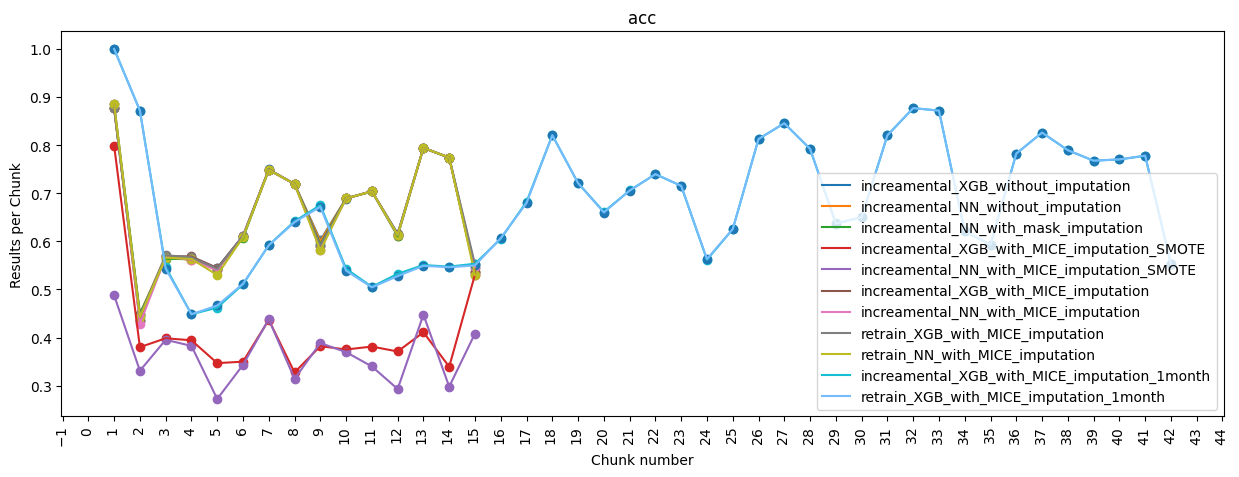

mean f1 increamental_XGB_without_imputation : 0.5653
mean f1 increamental_NN_without_imputation : 0.5668
mean f1 increamental_NN_with_mask_imputation : 0.5650
mean f1 increamental_XGB_with_MICE_imputation_SMOTE : 0.4682
mean f1 increamental_NN_with_MICE_imputation_SMOTE : 0.4344
mean f1 increamental_XGB_with_MICE_imputation : 0.5652
mean f1 increamental_NN_with_MICE_imputation : 0.5638
mean f1 retrain_XGB_with_MICE_imputation : 0.5658
mean f1 retrain_NN_with_MICE_imputation : 0.5548
mean f1 increamental_XGB_with_MICE_imputation_1month : 0.5994
mean f1 retrain_XGB_with_MICE_imputation_1month : 0.5922


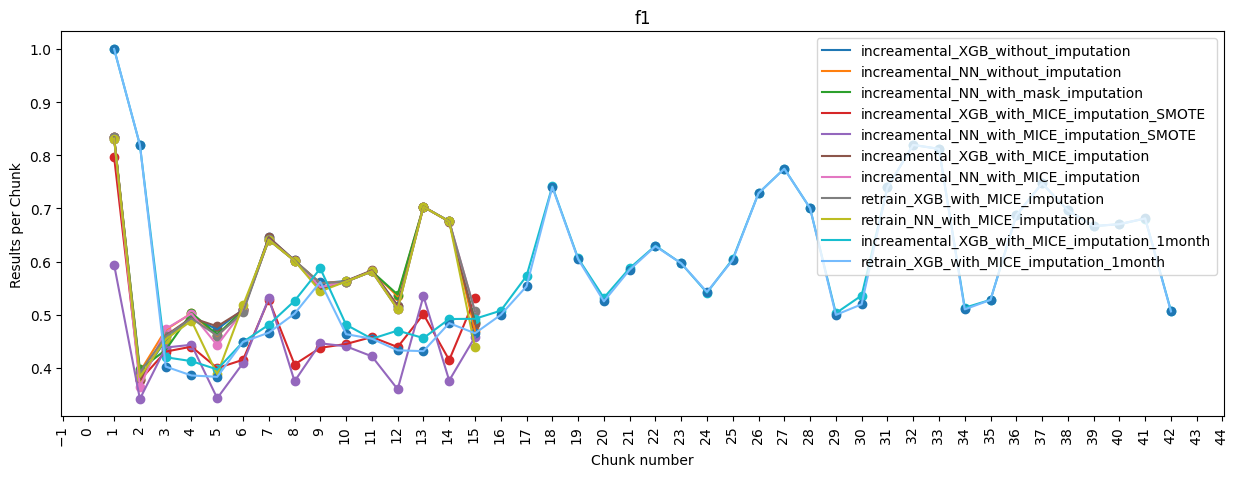

mean precision increamental_XGB_without_imputation : 0.5709
mean precision increamental_NN_without_imputation : 0.5330
mean precision increamental_NN_with_mask_imputation : 0.5264
mean precision increamental_XGB_with_MICE_imputation_SMOTE : 0.6032
mean precision increamental_NN_with_MICE_imputation_SMOTE : 0.6014
mean precision increamental_XGB_with_MICE_imputation : 0.5580
mean precision increamental_NN_with_MICE_imputation : 0.5338
mean precision retrain_XGB_with_MICE_imputation : 0.5501
mean precision retrain_NN_with_MICE_imputation : 0.5334
mean precision increamental_XGB_with_MICE_imputation_1month : 0.5839
mean precision retrain_XGB_with_MICE_imputation_1month : 0.5829


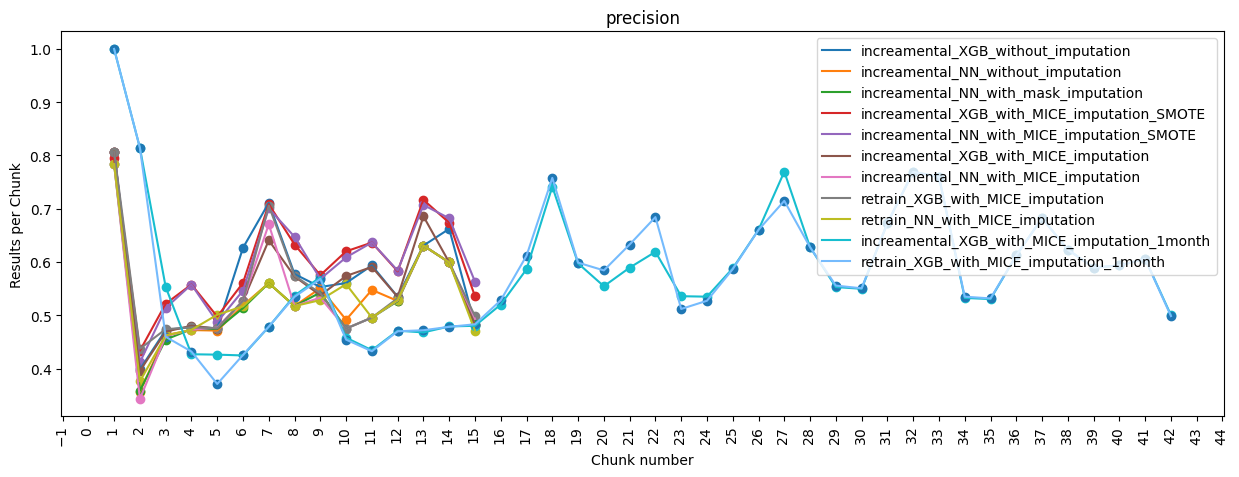

mean recall increamental_XGB_without_imputation : 0.6527
mean recall increamental_NN_without_imputation : 0.6522
mean recall increamental_NN_with_mask_imputation : 0.6528
mean recall increamental_XGB_with_MICE_imputation_SMOTE : 0.4148
mean recall increamental_NN_with_MICE_imputation_SMOTE : 0.3672
mean recall increamental_XGB_with_MICE_imputation : 0.6518
mean recall increamental_NN_with_MICE_imputation : 0.6510
mean recall retrain_XGB_with_MICE_imputation : 0.6534
mean recall retrain_NN_with_MICE_imputation : 0.6499
mean recall increamental_XGB_with_MICE_imputation_1month : 0.6811
mean recall retrain_XGB_with_MICE_imputation_1month : 0.6806


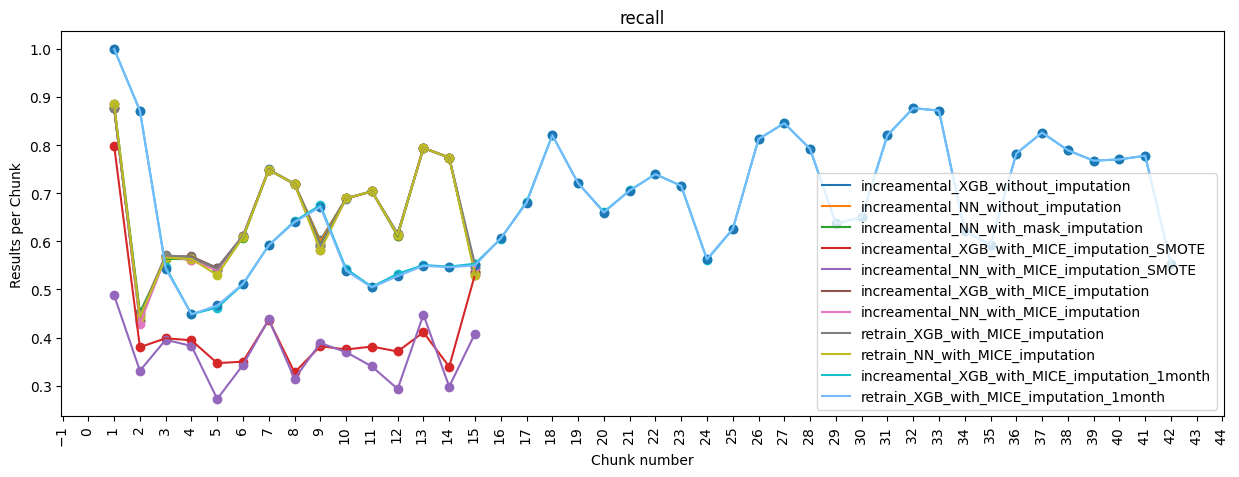

mean auc increamental_XGB_without_imputation : 0.5139
mean auc increamental_NN_without_imputation : 0.5144
mean auc increamental_NN_with_mask_imputation : 0.5133
mean auc increamental_XGB_with_MICE_imputation_SMOTE : 0.5584
mean auc increamental_NN_with_MICE_imputation_SMOTE : 0.5552
mean auc increamental_XGB_with_MICE_imputation : 0.5136
mean auc increamental_NN_with_MICE_imputation : 0.5129
mean auc retrain_XGB_with_MICE_imputation : 0.5141
mean auc retrain_NN_with_MICE_imputation : 0.5103
mean auc increamental_XGB_with_MICE_imputation_1month : 0.5135
mean auc retrain_XGB_with_MICE_imputation_1month : 0.5112


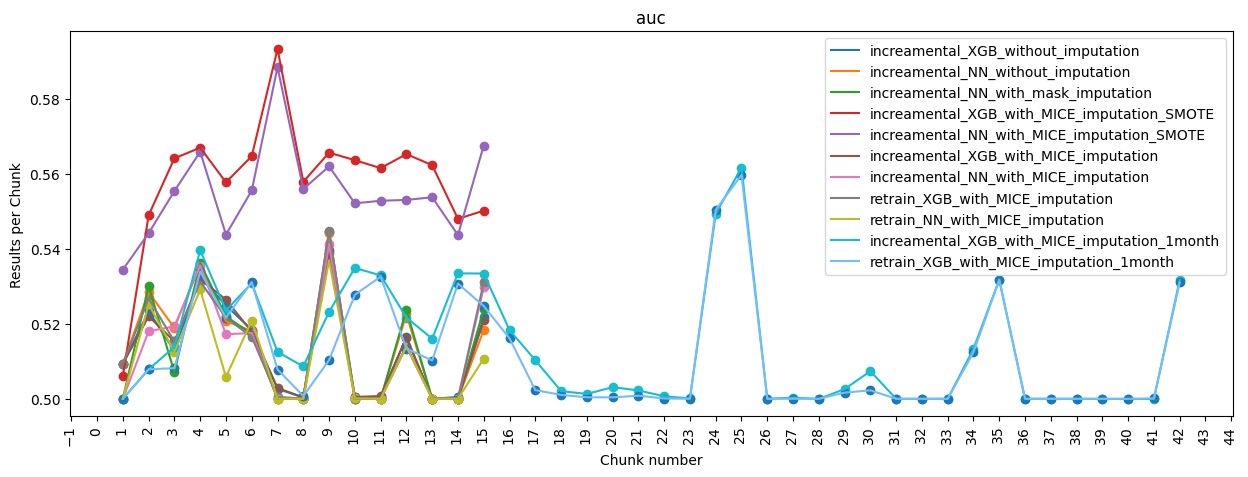

In [4]:
import matplotlib.ticker as mticker
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.preprocessing import label_binarize



def plot_results(over_all_results ,metrics, step=1):
  colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple',
          'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
          'xkcd:sky blue', 'xkcd:coral', 'xkcd:lime green', 'xkcd:salmon',
          'xkcd:lavender', 'xkcd:tan', 'xkcd:hot pink', 'xkcd:dark gray',
          'xkcd:yellow green', 'xkcd:teal']
  for metric in metrics:
    plt.figure(figsize=(15, 5))
    plt.title(metric)
    for i , method in enumerate(over_all_results.keys()):
        print("mean",metric, method,':' ,"{:.4f}".format(np.mean(over_all_results[method][metric])))

        x = [k+1 for k in range(len(over_all_results[method][metric]))]
        y = [over_all_results[method][metric][i] for i in range(len(over_all_results[method][metric]))]
        plt.plot(x, y,color=colors[i], label=method)
        plt.scatter(x, y)  # Add dots to the plot

    plt.legend(loc="best")
    plt.xlabel('Chunk number')
    plt.ylabel('Results per Chunk')

    # Format x-axis ticks as integers
    plt.xticks(rotation=90)
    plt.gca().xaxis.set_major_locator(plt.MultipleLocator(step))
    plt.gca().xaxis.set_major_formatter(plt.ScalarFormatter(useOffset=False, useMathText=True))

    # plt.savefig(os.path.join(os.path.join(results_path, 'Imges'), metric_name))
    # plt.savefig(os.path.join(os.path.join(results_path, 'Imges'), metric_name+'.svg'), format='svg')
    plt.show()

    # # Format x-axis ticks as integers
    # plt.xticks(rotation=90)
    # plt.gca().xaxis.set_major_locator(plt.MultipleLocator(step))
    # plt.gca().xaxis.set_major_formatter(plt.ScalarFormatter(useOffset=False, useMathText=True))

    # # plt.savefig(os.path.join(os.path.join(results_path, 'Imges'), metric_name))
    # # plt.savefig(os.path.join(os.path.join(results_path, 'Imges'), metric_name+'.svg'), format='svg')
    # plt.show()
plot_results(over_all_results,['acc','f1','precision','recall','auc'])